# Análisis de las tarifas del operador de telecomunicaciones: Megaline

# Contents
* [1.- Introducción y Objetivos.](#objetivo)
* [2.-Importacion de los archivos](#importacion)
* [3.-Preparación de los datos](#preparación)
* [3.1 El número de llamadas realizadas y minutos utilizados al mes](#pregunta1)
* [3.2 La cantidad de los SMS enviados por mes.](#pregunta2)
* [3.3 El volumen de datos por mes.](#pregunta3)
* [3.4 Los ingresos mensuales de cada usuario](#pregunta4)
* [4.- Análisis de los datos](#análisis)
* [5.- Prueba de hipótesis](#pruebas)
* [6.- Conclusión General](#conclusiongeneral)

## Introducción y Objetivos

En Megaline ofrecemos servicios de telecomunicaciones a nuestros clientes en dos opciones de tarifas de prepago: Surf y Ultimate. 

* **Surf**

Pago mensual: 20$

500 minutos al mes, 50 SMS y 15 GB de datos

Si se exceden los límites del paquete:

1 minuto: 3 centavos
1 SMS: 3 centavos
1 GB de datos: 10$




* **Ultimate**

Pago mensual: 70$

3000 minutos al mes, 1000 SMS y 30 GB de datos

Si se exceden los límites del paquete:

1 minuto: 1 centavo
1 SMS: 1 centavo
1 GB de datos: 7$


Mi equipo comercial quiere saber cuál de los dos planes genera más ingresos para ajustar el presupuesto de publicidad.

Para ello se realizará un análisis preliminar de las dos tarifas basado en una selección de 500 de nuestros clientes para evaluar su comportamiento de consumo por mes en base a sus caracterísiticas sobre cual tarifa usan, duración de las llamadas, la cantidad de mensajes que enviaron y los GB usados en la navegación de interntet en el año 2018.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Buen inicio. Esto nos permite establecer una ruta de trabajo clara.
</div>

## Importación de los archivos

Importaremos las siguientes librerías:

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as stats 
from scipy import stats as st

Procederemos a importar nuestros 5 archivos que estan en cada ruta a continuación: 
* Llamadas
* Internet 
*  SMS 
*  Planes de Megaline
*  Usuarios

In [2]:


df_calls=pd.read_csv('/datasets/megaline_calls.csv')
df_internet= pd.read_csv('/datasets/megaline_internet.csv')
df_messages=pd.read_csv('/datasets/megaline_messages.csv')
df_plans= pd.read_csv('/datasets/megaline_plans.csv')
df_users= pd.read_csv('/datasets/megaline_users.csv')



En cada archivo imprimiremos su información y las 10 primeras filas para observar la estructura de los datos.

* Llamadas

In [3]:
df_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [4]:
df_calls.head(10)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


Podemos ver que el campo de fecha de la llamada telefónica está siendo considerada como un tipo objeto en lugar de fecha. 

* Internet

In [5]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [6]:
df_internet.head(10)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


Megaline redondea los megabytes en Gigabytes, por lo que la columna mb_used se encuentra en megabytes y se tendría que aplicar esta conversión: 
    1GB = 1072mg
    
De igual manera el campo de fecha se encuentra como tipo objeto y se tendrá que cambiar a tipo fecha.




* SMS

In [7]:
df_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
df_messages.head(10)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


En mensajes se aplicará el cambio de tipo de dato de message_date a tipo fecha.

* Planes de Magaline

In [9]:
df_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [10]:
df_plans.head(2)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


En la columna mb_per_month_included esta en megabytes por lo que tambien se debería aplicar la conversión a gigabytes.

* Usuarios

In [11]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [12]:
df_users.head(10)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


Los campos de fecha de inicio y fin de sucripción de la tarifa se encuentra como tipo objeto, se tienen que cambiar a tipo fecha. 
Encontramos valores ausentes en la fecha de fin de susripción dado que en ese entonces cuando se recopilaron los datos esos clientes seguian con el plan vigente. 

**Conclusión:**
* Cambio de tipo de dato a fecha para los archivos: Llamadas, SMS, Internet y Usuarios.
* Conversión y redondeo de megabytes a gigabytes para los archivos:Internet y planes.
* Redondeo de los minutos de las llamdas
* Los valores ausentes del  archivo de usuarios en la columna de churn_date se interpreta como que esos clientes aun seguian en ese plan de tarifa cuando se levantó la información.

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Sara.
</div>

## Preparación de los datos

Procederemos primero a cambiar las columnas de fechas y la conversion de MB a GB que ya fueron identicados en los archivos anteriormente mencionados.

Adicional en esta sección identificaremos errores o valores atípicos que pueden distorcionar el análisis para responder a los objetivos.

Finalmente para cada usuario resumiremos la siguiente información:

**3.1 El número de llamadas realizadas y minutos utilizados al mes**

**3.2 La cantidad de los SMS enviados por mes.**

**3.3 El volumen de datos por mes.**

**3.4 Los ingresos mensuales de cada usuario**



* Llamadas

In [13]:
#Cambio del tipo de dato de fecha
df_calls['call_date']=pd.to_datetime(df_calls['call_date'],format='%Y/%m/%dT')
print(df_calls['call_date'])

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]


* SMS

In [14]:
#Cambio del tipo de dato de fecha
df_messages['message_date']=pd.to_datetime(df_messages['message_date'],format='%Y/%m/%dT')
print(df_messages['message_date'])

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]


* Internet

In [15]:
#Cambio del tipo de dato de fecha
df_internet['session_date']=pd.to_datetime(df_internet['session_date'],format='%Y/%m/%dT')
print(df_internet['session_date'])

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]


* Usuarios

In [16]:
#Cambio del tipo de dato de fecha
df_users['reg_date']=pd.to_datetime(df_users['reg_date'],format='%Y/%m/%dT')
print(df_users['reg_date'])

0     2018-12-24
1     2018-08-13
2     2018-10-21
3     2018-01-28
4     2018-05-23
         ...    
495   2018-09-04
496   2018-02-20
497   2018-12-10
498   2018-02-04
499   2018-05-06
Name: reg_date, Length: 500, dtype: datetime64[ns]


In [17]:
# Para los valores ausentes los rellenaremos con la fecha de corte del mes de agosto del 2022 para indicar que esos son los usuarios vigentes con los planes de suscripción.
df_users['churn_date']=df_users['churn_date'].fillna('2022-08-01')
df_users['churn_date']

0      2022-08-01
1      2022-08-01
2      2022-08-01
3      2022-08-01
4      2022-08-01
          ...    
495    2022-08-01
496    2022-08-01
497    2022-08-01
498    2022-08-01
499    2022-08-01
Name: churn_date, Length: 500, dtype: object

In [18]:
#Cambio del tipo de dato de fecha
df_users['churn_date']=pd.to_datetime(df_users['churn_date'],format='%Y/%m/%d')
df_users['churn_date'].head(10)

0   2022-08-01
1   2022-08-01
2   2022-08-01
3   2022-08-01
4   2022-08-01
5   2022-08-01
6   2018-12-18
7   2022-08-01
8   2022-08-01
9   2022-08-01
Name: churn_date, dtype: datetime64[ns]

* Planes de Megaline

Dado que sabemos que para ambos planes ofrecemos 15 GB y 30 GB, aplicaremos este cambio en el archivo de planes. 
Realizaremos los mismos pasos para la conversión de MG a GB, crearemos el nombre de la columna: 'gb_per_month_included'

In [19]:
df_plans['gb_per_month_included']=np.ceil(df_plans['mb_per_month_included']/1024)
df_plans['gb_per_month_included']=df_plans['gb_per_month_included'].astype(int)
df_plans['gb_per_month_included']

0    15
1    30
Name: gb_per_month_included, dtype: int64

Continuando al segundo punto, aplicaremos el método describe para observar los estadísticos para la duración de las llamadas.

In [20]:
df_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


La media de las llamadas son aproximadamente 7 minutos y la mediana es menor con 6 minutos, con estos datos la distrubucion de la duracion de las llamadas tendría un ligero sesgo hacia la derecha, siendo una asimetría positiva. 

Sin embargo observamos duraciones muy cortas en las llamadas con un mínimo de 0 minutos, esto se puede interpretar que fueron seguramente llamadas perdidas o que contestaron y al instante se colgó la llamada o también la duración del tiempo de marcación hasta que la otra línea(usuario) conteste, existen varias opciones para que tengamos estos datos atípicos.

A continuación veremos la distribución de la duración de las llamadas para conocer cuantos clientes registran este tipo de caso.



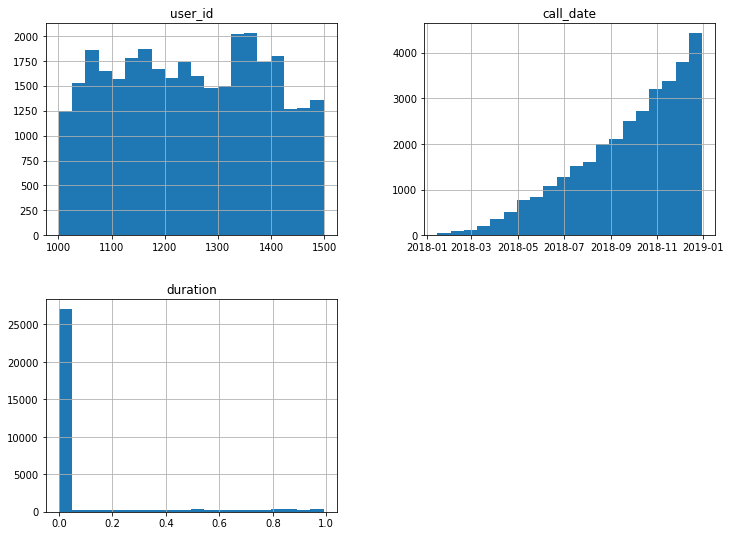

In [21]:
# Histogramas incluyendo la duración de las llamadas menores a 1 minuto.
df_calls_with0= df_calls.query('duration <1')
df_calls_with0_h= df_calls_with0.hist(bins=20,grid=True,figsize=(12,9))

In [22]:
df_calls_with0.count()

id           32559
user_id      32559
call_date    32559
duration     32559
dtype: int64

In [23]:
porcentaje=(df_calls_with0.count()/len(df_calls))*100
print(porcentaje)

id           23.638872
user_id      23.638872
call_date    23.638872
duration     23.638872
dtype: float64


Tenemos 32.559 registros de llamadas con duración menor a 1 minuto que representan el 23% del total de registros.

Dado que el objetivo es identificar cual tarifa de prepago es que el representa mayores ingresos y el compartamiento del cliente no nos van a servir incluir en nuestro análisis llamadas con muy poca duración por la razones mencionadas. Por lo que guardaremos el DataFrame filtrado de las llamadas a partir de 1 minuto de duración para el continuo análisis.

A continuación obersaveremos los mismos histogramas pero a partir de 1 minuto de duración y observar la nueva distribución.

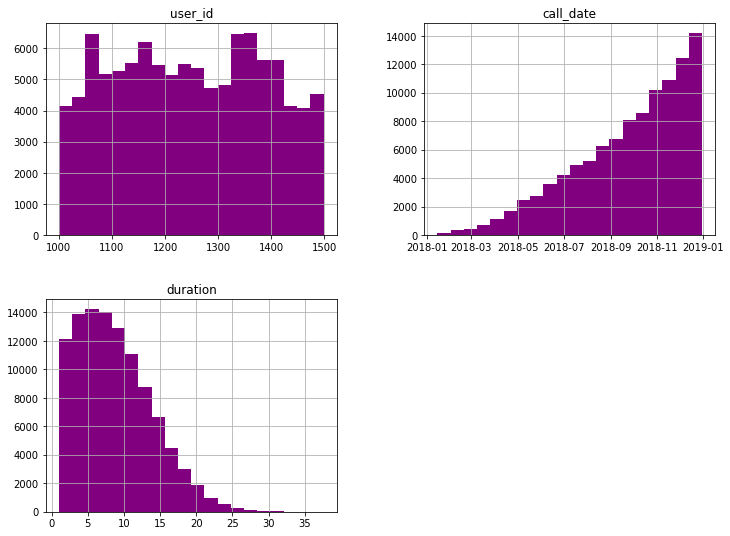

In [24]:
#Histogramas incluyendo llamadas mayores a 0 minutos.
df_calls_without0= df_calls.query('duration >=1')
df_calls_without0_h= df_calls_without0.hist(bins=20,grid=True, figsize=(12,9), color='purple')

In [25]:
df_calls=df_calls.query('duration >=1')
df_calls['duration'].value_counts().sort_index()

1.00     70
1.01     58
1.02     64
1.03     56
1.04     51
         ..
35.35     1
35.74     1
35.88     1
36.24     1
37.60     1
Name: duration, Length: 2702, dtype: int64

Finalmente tenemos nuestra Dataframe de la duración de llamdas de 1 minuto en adelante que nos servirá para el posterior análisis.

**3.1 El número de llamadas realizadas y minutos utilizados al mes por cada usuario**



In [26]:
#Utilizaremos el método de dt.month para convertir el campo de fecha en el número del mes del año que corresponde.
df_calls['month']=df_calls['call_date'].dt.month
#Realizaremos una tabla dinámica para contar el número de llamadas realizadas por usuario y por mes.
df_total_calls=df_calls.pivot_table(index=['user_id','month'],values='duration',aggfunc='count')
#Para idenfiticar el cálculo cambiaremos de nombre a la columna.
df_total_calls=df_total_calls.rename(columns={'duration':'total_calls'})
df_total_calls

total_calls
user_id month             
1000    12              16
1001    8               21
        9               38
        10              45
        11              44
...                    ...
1498    12              31
1499    9               35
        10              38
        11              36
        12              52

[2256 rows x 1 columns]

In [27]:
#Realizaremos una tabla dinámica para sumar la duración de las llamadas realizadas por usuario y por mes.
df_duration_calls=df_calls.pivot_table(index=['user_id','month'],values='duration',aggfunc='sum')

#Para idenfiticar el cálculo cambiaremos de nombre a la columna.
df_duration_calls=df_duration_calls.rename(columns={'duration':'duration_calls'})
df_duration_calls

duration_calls
user_id month                
1000    12             116.83
1001    8              170.60
        9              297.69
        10             372.31
        11             401.53
...                       ...
1498    12             324.01
1499    9              330.37
        10             361.51
        11             286.99
        12             465.76

[2256 rows x 1 columns]

In [28]:
#Comprobamos si no tenemos valores ausentes
df_duration_calls.isna().sum()

duration_calls    0
dtype: int64

**3.2 La cantidad de los SMS enviados por mes por cada usuario**



In [29]:
#Utilizaremos el método de dt.month para convertir el campo de fecha en el número del mes del año que corresponde.
df_messages['month']=df_messages['message_date'].dt.month

#Realizaremos una tabla dinámica para contar la cantidad de SMS enviados por usuario y por mes.
df_total_messages=df_messages.pivot_table(index=['user_id','month'],values='id',aggfunc='count')

#Para idenfiticar el cálculo cambiaremos de nombre a la columna.
df_total_messages=df_total_messages.rename(columns={'id':'total_messages'})
df_total_messages

total_messages
user_id month                
1000    12                 11
1001    8                  30
        9                  44
        10                 53
        11                 36
...                       ...
1496    9                  21
        10                 18
        11                 13
        12                 11
1497    12                 50

[1806 rows x 1 columns]

In [30]:
#Comprobamos si no tenemos valores ausentes
df_total_messages.isna().sum()

total_messages    0
dtype: int64

**3.3 El volumen de datos por mes por cada usuario**



In [31]:
#Utilizaremos el método de dt.month para convertir el campo de fecha en el número del mes del año que corresponde.
df_internet['month']=df_internet['session_date'].dt.month

#Realizaremos una tabla dinámica para sumar el volumen de datos consumidos por usuario y por mes.
df_total_mb=df_internet.pivot_table(index=['user_id','month'],values='mb_used',aggfunc='sum')

df_total_mb

mb_used
user_id month          
1000    12      1901.47
1001    8       6919.15
        9      13314.82
        10     22330.49
        11     18504.30
...                 ...
1498    12     23137.69
1499    9      12984.76
        10     19492.43
        11     16813.83
        12     22059.21

[2277 rows x 1 columns]

In [32]:
#Comprobamos si no tenemos valores ausentes
df_total_mb.isna().sum()

mb_used    0
dtype: int64

<div class="alert alert-block alert-success">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo.
</div>

**3.4 Los ingresos mensuales de cada usuario**

Primero debemos realizar una concatenación de las tablas creadas anteriormente para tener la duración de llamadas, SMS enviados y volumen de datos consumidos por usuario y por mes.


In [33]:
merged_data = pd.concat([df_duration_calls, df_total_messages,df_total_mb], axis=1)
merged_data

duration_calls  total_messages   mb_used
user_id month                                          
1000    12             116.83            11.0   1901.47
1001    8              170.60            30.0   6919.15
        9              297.69            44.0  13314.82
        10             372.31            53.0  22330.49
        11             401.53            36.0  18504.30
...                       ...             ...       ...
1498    12             324.01             NaN  23137.69
1499    9              330.37             NaN  12984.76
        10             361.51             NaN  19492.43
        11             286.99             NaN  16813.83
        12             465.76             NaN  22059.21

[2293 rows x 3 columns]

In [34]:
#Comprobamos si no tenemos valores ausentes
merged_data.isna().sum()

duration_calls     37
total_messages    487
mb_used            16
dtype: int64

Encontramos valores ausentes después de hacer la concatenación entre las 3 tablas, se puede deber a que no en todos los meses los usuarios hicieron consumos de sus minutos de llamadas, ni mensajes ni tampoco del volumen de datos 
Es por eso eso que esos valores serán reemplazados por 0 para indicar que no fueron consumidos. 

In [35]:
columns_to_fill=['duration_calls','total_messages','mb_used']
for column in columns_to_fill:
    merged_data[column]=merged_data[column].fillna(0)


In [36]:
#Comprobamos nuevamente si no tenemos valores ausentes
merged_data.isna().sum()

duration_calls    0
total_messages    0
mb_used           0
dtype: int64

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Listo, gracias.</div>

Como segundo paso para conocer los ingresos extras fuera del plan, es decir los minutos, SMS o datos que los clientes consumieron fuera de los límites del plan. Tendremos que unir nuestra tabla anterior que contiene el detalle de lo que fue consumido junto con el archivo de Usuarios y Planes de Megaline. 

Dado que en la primera sección imprimimos los nombres de las columnas de nuestros archivos, podemos ver que el archivo Usuarios y Planes de Megaline en la columna que identifica cual es el plan, tiene escrito de manera diferente por lo que tenemos que poner los nombres iguales antes para que en el merge pueda reconcoerlos.

In [37]:
df_plans=df_plans.rename(columns={'plan_name':'plan'})
df_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan,gb_per_month_included
0,50,15360,500,20,10,0.03,0.03,surf,15
1,1000,30720,3000,70,7,0.01,0.01,ultimate,30


In [38]:
#Realizamos la unión de las tablas primero con el archivo de Usuarios, para hacer el match a través de la columna de user_id.
merged_data=merged_data.join(df_users.set_index('user_id'),on='user_id')
merged_data.head(5)

duration_calls  total_messages   mb_used first_name  last_name  \
user_id month                                                                   
1000    12             116.83            11.0   1901.47   Anamaria      Bauer   
1001    8              170.60            30.0   6919.15     Mickey  Wilkerson   
        9              297.69            44.0  13314.82     Mickey  Wilkerson   
        10             372.31            53.0  22330.49     Mickey  Wilkerson   
        11             401.53            36.0  18504.30     Mickey  Wilkerson   

               age                                   city   reg_date  \
user_id month                                                          
1000    12      45  Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24   
1001    8       28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        9       28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        10      28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        11      28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   

                   plan churn_date  
user_id month                       
1000    12     ultimate 2022-08-01  
1001    8          surf 2022-08-01  
        9          surf 2022-08-01  
        10         surf 2022-08-01  
        11         surf 2022-08-01

In [39]:
#Realizamos la seguna unión de las tablas con el archivo de Planes de Megaline para hacer el match a través de la columna de plan.
merged_data=merged_data.join(df_plans.set_index('plan'),on='plan')
merged_data.head(10)

duration_calls  total_messages   mb_used first_name  last_name  \
user_id month                                                                   
1000    12             116.83            11.0   1901.47   Anamaria      Bauer   
1001    8              170.60            30.0   6919.15     Mickey  Wilkerson   
        9              297.69            44.0  13314.82     Mickey  Wilkerson   
        10             372.31            53.0  22330.49     Mickey  Wilkerson   
        11             401.53            36.0  18504.30     Mickey  Wilkerson   
        12             392.06            44.0  19369.18     Mickey  Wilkerson   
1002    10              53.80            15.0   6552.01     Carlee    Hoffman   
        11             358.70            32.0  19345.08     Carlee    Hoffman   
        12             363.24            41.0  14396.24     Carlee    Hoffman   
1003    12            1038.39            50.0  27044.14   Reynaldo    Jenkins   

               age                                   city   reg_date  \
user_id month                                                          
1000    12      45  Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24   
1001    8       28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        9       28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        10      28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        11      28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        12      28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
1002    10      36   Las Vegas-Henderson-Paradise, NV MSA 2018-10-21   
        11      36   Las Vegas-Henderson-Paradise, NV MSA 2018-10-21   
        12      36   Las Vegas-Henderson-Paradise, NV MSA 2018-10-21   
1003    12      52                          Tulsa, OK MSA 2018-01-28   

                   plan churn_date  messages_included  mb_per_month_included  \
user_id month                                                                  
1000    12     ultimate 2022-08-01               1000                  30720   
1001    8          surf 2022-08-01                 50                  15360   
        9          surf 2022-08-01                 50                  15360   
        10         surf 2022-08-01                 50                  15360   
        11         surf 2022-08-01                 50                  15360   
        12         surf 2022-08-01                 50                  15360   
1002    10         surf 2022-08-01                 50                  15360   
        11         surf 2022-08-01                 50                  15360   
        12         surf 2022-08-01                 50                  15360   
1003    12         surf 2022-08-01                 50                  15360   

               minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
user_id month                                                                   
1000    12                 3000               70           7             0.01   
1001    8                   500               20          10             0.03   
        9                   500               20          10             0.03   
        10                  500               20          10             0.03   
        11                  500               20          10             0.03   
        12                  500               20          10             0.03   
1002    10                  500               20          10             0.03   
        11                  500               20          10             0.03   
        12                  500               20          10             0.03   
1003    12                  500               20          10             0.03   

               usd_per_minute  gb_per_month_included  
user_id month                                         
1000    12               0.01                     30  
1001    8                0.03                     15  
        9              

Tenemos lista la tabla con las columnas que nos interesan para el cálculo del total de ingresos por usuario y por mes. 





Se procederá a realizar el redondeo de los minutos de las llamadas telefónicas y el volumen de internet de MB a GB.

In [40]:
# Redondeamos la columna original de los minutos de las llamadas.
merged_data['duration_calls']=np.ceil(merged_data['duration_calls'])
merged_data['duration_calls']=merged_data['duration_calls'].astype(int)
merged_data['duration_calls']

user_id  month
1000     12       117
1001     8        171
         9        298
         10       373
         11       402
                 ... 
1498     12       325
1499     9        331
         10       362
         11       287
         12       466
Name: duration_calls, Length: 2293, dtype: int64

Para la conversión de MG a GB dividiremos para 1024 y aproximaremos a su valor superior, dado que nos interesa saber cuantos Gigas consumieron en su plan y por mes, tambien se cambiará el tipo de dato de la columna que crearemos con el nombre de 'gb_used' a tipo entero.

In [41]:
#Crearemos una columna con el nombre gb_used para identificar esta conversión de MB a GB.
merged_data['gb_used']= np.ceil(merged_data['mb_used'] / 1024)
merged_data['gb_used'] = merged_data['gb_used'].astype(int)
merged_data['gb_used']

user_id  month
1000     12        2
1001     8         7
         9        14
         10       22
         11       19
                  ..
1498     12       23
1499     9        13
         10       20
         11       17
         12       22
Name: gb_used, Length: 2293, dtype: int64

In [42]:
#Comprobaremos si se efectuaron ambos cambios
merged_data.head(4)

duration_calls  total_messages   mb_used first_name  last_name  \
user_id month                                                                   
1000    12                117            11.0   1901.47   Anamaria      Bauer   
1001    8                 171            30.0   6919.15     Mickey  Wilkerson   
        9                 298            44.0  13314.82     Mickey  Wilkerson   
        10                373            53.0  22330.49     Mickey  Wilkerson   

               age                                   city   reg_date  \
user_id month                                                          
1000    12      45  Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24   
1001    8       28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        9       28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        10      28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   

                   plan churn_date  messages_included  mb_per_month_included  \
user_id month                                                                  
1000    12     ultimate 2022-08-01               1000                  30720   
1001    8          surf 2022-08-01                 50                  15360   
        9          surf 2022-08-01                 50                  15360   
        10         surf 2022-08-01                 50                  15360   

               minutes_included  usd_monthly_pay  usd_per_gb  usd_per_message  \
user_id month                                                                   
1000    12                 3000               70           7             0.01   
1001    8                   500               20          10             0.03   
        9                   500               20          10             0.03   
        10                  500               20          10             0.03   

               usd_per_minute  gb_per_month_included  gb_used  
user_id month                                                  
1000    12               0.01                     30        2  
1001    8                0.03                     15        7  
        9                0.03                     15       14  
        10               0.03                     15       22

Primero empezaremos con el cálculo de los consumos extras fuera del límite de su plan, lo haremos por cada canal y separar en minutos, mensajes y Gb a través de 3 funciones.

In [43]:
#Creamos una funcion para identificar los minutos extra consumidos por los clientes. 
def calls_extra(row):
    
    duration_calls=row['duration_calls']
    plan= row['plan']
    
    if plan == 'surf':
        if duration_calls >= 500:
            return duration_calls-500
    if plan == 'ultimate':
        if duration_calls >=3000:
            return duration_calls -3000
    return 0

In [44]:
#Comprobamos la función con la fila 9 del DataFrame  que tenia mas minutos registrados.
calls_extra(merged_data.iloc[9])

539

In [45]:
#Aplicaremos la función al DataFrame y utilizaremos try y except para comprobar si funciona.
try:
    merged_data['calls_extra']=merged_data.apply(calls_extra, axis=1)
    
except:
    print('Error de función')

In [46]:
#Creamos una funcion para identificar los mensajes extras enviados por los clientes. 
def messages_extra(row):
    
    total_messages=row['total_messages']
    plan= row['plan']
    
    if plan == 'surf':
        if total_messages >= 50:
            return total_messages-50
    if plan == 'ultimate':
        if total_messages >=1000:
            return total_messages -1000
    return 0

In [47]:
#Comprobamos la función con la fila 3 del DataFrame  que tenia mas mensajes enviados.
messages_extra(merged_data.iloc[3])

3.0

In [48]:
#Aplicaremos la función al DataFrame y utilizaremos try y except para comprobar si funciona.
try:
    merged_data['messages_extra']=merged_data.apply(messages_extra, axis=1)
    
except:
    print('Error de función')

In [49]:
#Creamos una funcion para identificar los GB extras consumidos por los clientes.
def gb_extra(row):
    
    gb_used=row['gb_used']
    plan= row['plan']
    
    if plan== 'surf':
        if gb_used >= 15:
            return gb_used-15
    if plan == 'ultimate':
        if gb_used >=30:
            return gb_used -30
    return 0

In [50]:
#Comprobamos la función con la fila 7 del DataFrame  que tenia mas mensajes enviados.
gb_extra(merged_data.iloc[3])

7

In [51]:
#Aplicaremos la función al DataFrame y utilizaremos try y except para comprobar si funciona.
try:
    merged_data['gb_extra']=merged_data.apply(gb_extra, axis=1)
    
except:
    print('Error de función')

In [52]:
#Imprimimos las primeras 5 filas del DataFrame para ver las columnas que hemos agregado.
merged_data.head(5)

duration_calls  total_messages   mb_used first_name  last_name  \
user_id month                                                                   
1000    12                117            11.0   1901.47   Anamaria      Bauer   
1001    8                 171            30.0   6919.15     Mickey  Wilkerson   
        9                 298            44.0  13314.82     Mickey  Wilkerson   
        10                373            53.0  22330.49     Mickey  Wilkerson   
        11                402            36.0  18504.30     Mickey  Wilkerson   

               age                                   city   reg_date  \
user_id month                                                          
1000    12      45  Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24   
1001    8       28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        9       28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        10      28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        11      28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   

                   plan churn_date  ...  minutes_included  usd_monthly_pay  \
user_id month                       ...                                      
1000    12     ultimate 2022-08-01  ...              3000               70   
1001    8          surf 2022-08-01  ...               500               20   
        9          surf 2022-08-01  ...               500               20   
        10         surf 2022-08-01  ...               500               20   
        11         surf 2022-08-01  ...               500               20   

               usd_per_gb  usd_per_message  usd_per_minute  \
user_id month                                                
1000    12              7             0.01            0.01   
1001    8              10             0.03            0.03   
        9              10             0.03            0.03   
        10             10             0.03            0.03   
        11             10             0.03            0.03   

               gb_per_month_included  gb_used  calls_extra  messages_extra  \
user_id month                                                                
1000    12                        30        2            0             0.0   
1001    8                         15        7            0             0.0   
        9                         15       14            0             0.0   
        10                        15       22            0             3.0   
        11                        15       19            0             0.0   

               gb_extra  
user_id month            
1000    12            0  
1001    8             0  
        9             0  
        10            7  
        11            4  

[5 rows x 22 columns]

* Podemos ver en la tabla de resultados, que el primer usuario en el mes de diciembre no tuvo consumos adicionales fuera de su plan por cada canal porque estan valores en 0.

* El cliente 1001 el mes de octubre tenía contratado su plan de Surf y vemos que excedió 3 mensajes y en 22 GB adicionales.

* Con estas 3 columnas que hemos creado más adelante nos servirán para analizar el comportamiento de compra por cada plan.

* Dado que tenemos identificado los minutos,mensajes y GB extras tenemos que resumirlos a términos de ingresos para Megaline, a continuación aplicaremos una función para cálcular el ingreso total. 

In [53]:
#Creamos otra función para conocer el ingreso total de cada cliente de acuerdo a las tarifas base de cada plan y los costos extras por canal.
def Ingreso_Total(row):
    
    total_messages=row['total_messages']
    plan= row['plan']
    duration_calls=row['duration_calls']
    plan= row['plan']
    gb_used=row['gb_used']
    plan= row['plan']
    
#Si el plan es surf aplicamos cargos adicionales: 0.03 centavos por cada minuto extra,0.03 por mensajes y $10 por cada GB y sumamos la tarifa base.       
    if plan == 'surf':
        if total_messages >= 50 and duration_calls >=500 and gb_used>=15:
            return ((total_messages-50)*0.03+(duration_calls -500)*0.03+(gb_used-15)*10) + 20
        
        if total_messages < 50 and duration_calls >=500 and gb_used>=15:
            return ((duration_calls -500)*0.03+(gb_used-15)*10) + 20
        
        if total_messages >= 50 and duration_calls <500 and gb_used>=15:
            return ((total_messages-50)*0.03+(gb_used-15)*10) + 20
        
        if total_messages >= 50 and duration_calls >=500 and gb_used<15:
            return ((total_messages-50)*0.03+(duration_calls -500)*0.03) + 20
        
        if total_messages < 50 and duration_calls <500 and gb_used<15:
            return  20
        
        if total_messages >= 50 and duration_calls <500 and gb_used <15:
            return ((total_messages-50)*0.03) + 20
        
        if total_messages < 50 and duration_calls <500 and gb_used >=15:
            return ((gb_used-15)*10) + 20
        
        if total_messages < 50 and duration_calls >=500 and gb_used <15:
            return ((duration_calls -500)*0.03) + 20
                            
                  
#Si el plan es surf aplicamos cargos adicionales: 0.01 centavos por cada minuto extra,0.01 por mensajes y $7 por cada GB y sumamos la tarifa base.        
    if plan == 'ultimate':
        if total_messages >=1000 and duration_calls >=3000 and  gb_used >=30:
            return ((total_messages -1000)*0.01+(duration_calls -3000)*0.01+(gb_used -30)*7)+70
        
        if total_messages < 1000 and duration_calls >=3000 and gb_used>=30:
            return ((duration_calls -300)*0.01+(gb_used-30)*7) + 70
        
        if total_messages >= 1000 and duration_calls <3000 and gb_used>=30:
            return ((total_messages-1000)*0.01+(gb_used-30)*7) + 70
        
        if total_messages >= 1000 and duration_calls >=3000 and gb_used<30:
            return ((total_messages-1000)*0.01+(duration_calls -3000)*0.01) + 70
        
        if total_messages < 1000 and duration_calls <3000 and gb_used<30:
            return  70
        
        if total_messages >= 1000 and duration_calls <3000 and gb_used <30:
            return ((total_messages-1000)*0.01) + 70
        
        if total_messages < 1000 and duration_calls <3000 and gb_used >=30:
            return ((gb_used-30)*7) + 70
        
        if total_messages < 1000 and duration_calls >=3000 and gb_used <30:
            return ((duration_calls -3000)*0.01) + 70  
        
          
    return 70

In [54]:
try: 
    merged_data['Ingreso_Total']= merged_data.apply(Ingreso_Total, axis=1)
except: 
    print('Error de función')

In [55]:
#Comprobamos que se haya añadido
merged_data.head(5)

duration_calls  total_messages   mb_used first_name  last_name  \
user_id month                                                                   
1000    12                117            11.0   1901.47   Anamaria      Bauer   
1001    8                 171            30.0   6919.15     Mickey  Wilkerson   
        9                 298            44.0  13314.82     Mickey  Wilkerson   
        10                373            53.0  22330.49     Mickey  Wilkerson   
        11                402            36.0  18504.30     Mickey  Wilkerson   

               age                                   city   reg_date  \
user_id month                                                          
1000    12      45  Atlanta-Sandy Springs-Roswell, GA MSA 2018-12-24   
1001    8       28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        9       28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        10      28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   
        11      28        Seattle-Tacoma-Bellevue, WA MSA 2018-08-13   

                   plan churn_date  ...  usd_monthly_pay  usd_per_gb  \
user_id month                       ...                                
1000    12     ultimate 2022-08-01  ...               70           7   
1001    8          surf 2022-08-01  ...               20          10   
        9          surf 2022-08-01  ...               20          10   
        10         surf 2022-08-01  ...               20          10   
        11         surf 2022-08-01  ...               20          10   

               usd_per_message  usd_per_minute  gb_per_month_included  \
user_id month                                                           
1000    12                0.01            0.01                     30   
1001    8                 0.03            0.03                     15   
        9                 0.03            0.03                     15   
        10                0.03            0.03                     15   
        11                0.03            0.03                     15   

               gb_used  calls_extra  messages_extra  gb_extra  Ingreso_Total  
user_id month                                                                 
1000    12           2            0             0.0         0          70.00  
1001    8            7            0             0.0         0          20.00  
        9           14            0             0.0         0          20.00  
        10          22            0             3.0         7          90.09  
        11          19            0             0.0         4          60.00  

[5 rows x 23 columns]

 A continuación para verificar aplicaremos la función a una fila y tambien por medio de iloc para comprobar los resultados.

In [56]:
#Aplicamos la función con la fila 1998 del DataFrame
Ingreso_Total(merged_data.iloc[1998])

42.64

In [57]:
#Usamos iloc para ver el detalle de la fila 1998
merged_data.iloc[1998]

duration_calls                                     588
total_messages                                    28.0
mb_used                                       17051.28
first_name                                    Asuncion
last_name                                       Conrad
age                                                 66
city                     Phoenix-Mesa-Chandler, AZ MSA
reg_date                           2018-10-23 00:00:00
plan                                              surf
churn_date                         2022-08-01 00:00:00
messages_included                                   50
mb_per_month_included                            15360
minutes_included                                   500
usd_monthly_pay                                     20
usd_per_gb                                          10
usd_per_message                                   0.03
usd_per_minute                                    0.03
gb_per_month_included                               15
gb_used   

Listo, podemos ver con este ejemplo que se ha efectuado el cálculo. El cliente es del plan Surf, se pasó 88 minutos y 2 GB lo que se traduce en 22.64 dolares extras, adicional su tarifa base de 20 da un ingreso total de 42.64 dólares.


<div class="alert alert-info"> <b>Comentario del estudiante:</b> Listo, he creado 3 funciones por separado para conocer los consumos extras por canal y la ultima con el ingreso total(fijo + variable).</div>

In [58]:
#Finalmente volvemos a comprobar si no tenemos valores ausentes:
merged_data.isna().sum()

duration_calls           0
total_messages           0
mb_used                  0
first_name               0
last_name                0
age                      0
city                     0
reg_date                 0
plan                     0
churn_date               0
messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
gb_per_month_included    0
gb_used                  0
calls_extra              0
messages_extra           0
gb_extra                 0
Ingreso_Total            0
dtype: int64

A través de la función hemos creado una nueva columna que contiene el total de ingresos por cada cliente y por cada mes y para contemplarlo graficamente realizaremos 2 gráficos de barra para observar en cual plan se obtiene mayores ingresos.

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Listo, gracias.</div>

**Ingreso Total por tarifa:**

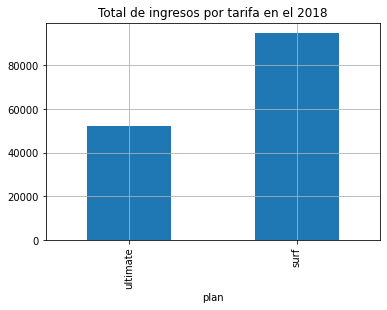

In [59]:
merged_pivot1=merged_data.pivot_table(index='plan',values='Ingreso_Total',aggfunc='sum')
merged_pivot_sort=merged_pivot1['Ingreso_Total'].sort_values(ascending=True)
merged_pivot_bar=merged_pivot_sort.plot(kind='bar',title='Total de ingresos por tarifa en el 2018', grid=True)

* Podemos observar una gran diferencia entre ambos planes, siendo Surf la principal tarifa que trae mayores ingresos totales de nuestra base de clientes en el 2018 con un total de 95.000 dólares.
* La razón es porque el plan Surf tiene cargos adicionales mucho más altas que Ultimate cuando se pasan de los límites establecidos. 
* De igual manera Surf es la tarifa más económica a tan solo 20 dólares comparado con Ultimate por un valor de 70 dólares, por lo tanto hay mayores clientes en la tarfia de Surf que prefieren pagar los cargos extras que es un monto variable según su consumo en lugar de pagar un valor fijo de 70.
* El equipo comercial se debería enfocar en la tarifa Surf porque tiene un potencial muy alto en rentabilidad y la diferencia con el plan Ultimate son 45.000 dólares aproximadamente.

**Ingreso Total por mes:**

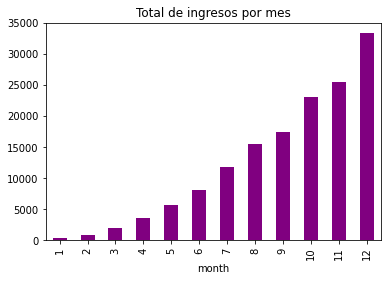

In [60]:
merged_pivot2=merged_data.pivot_table(index='month',values='Ingreso_Total',aggfunc='sum')
merged_pivot_sort=merged_pivot2['Ingreso_Total'].sort_values(ascending=True)
merged_pivot_bar=merged_pivot_sort.plot(kind='bar',title='Total de ingresos por mes', color='purple')

* El mes de diciembre es el que registra mayores ingresos, esto se puede deber al comportamiento de los clientes en sus consumos por ser un mes de celebración y fiestas. Alcanza un ingreso máximo en el año de 34.000 dólares.
* Por el contrario en el mes de enero hay un ingreso mínimo, y el primer trimestre estan por debajo de los 5.000 dólares
* Existe una relacion directamente propocional al total de ingresos y el mes en el que se encuentre, a medida que se vaya avanzando en el año mayores consumos extras realizarán.

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Listo, gracias.</div>

## Análisis de los datos

**4.1 Estudio del compartamiento de consumo**

Para poder encontrar el número de SMS, duración de llamadas y el volumen de datos que requieren los usuarios de cada tarifa en cada mes, procederemos a separar en 2 DataFrames por cada plan pero a partir de nuestra tabla general dejaremos unicamente las columnas que sean necesarias para el análisis.

In [61]:
df=merged_data.drop(columns=['first_name','last_name','age','reg_date','churn_date','usd_per_minute','usd_per_message','usd_per_gb','minutes_included','messages_included','gb_per_month_included','mb_per_month_included','usd_monthly_pay','mb_used'])
df.head(5)

duration_calls  total_messages  \
user_id month                                   
1000    12                117            11.0   
1001    8                 171            30.0   
        9                 298            44.0   
        10                373            53.0   
        11                402            36.0   

                                                city      plan  gb_used  \
user_id month                                                             
1000    12     Atlanta-Sandy Springs-Roswell, GA MSA  ultimate        2   
1001    8            Seattle-Tacoma-Bellevue, WA MSA      surf        7   
        9            Seattle-Tacoma-Bellevue, WA MSA      surf       14   
        10           Seattle-Tacoma-Bellevue, WA MSA      surf       22   
        11           Seattle-Tacoma-Bellevue, WA MSA      surf       19   

               calls_extra  messages_extra  gb_extra  Ingreso_Total  
user_id month                                                        
1000    12               0             0.0         0          70.00  
1001    8                0             0.0         0          20.00  
        9                0             0.0         0          20.00  
        10               0             3.0         7          90.09  
        11               0             0.0         4          60.00

Analizaremos brevemente la distrubucion de los consumos de manera general y el compartamiento de los clientes en el 2018 y por cada plan.

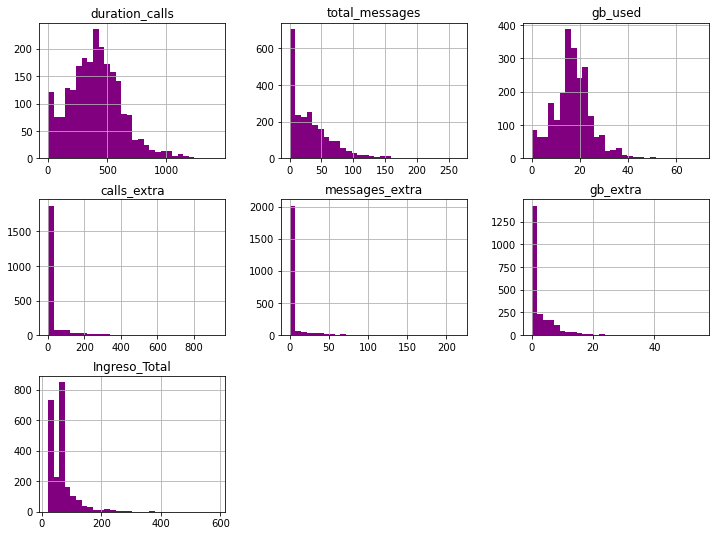

In [62]:
df.hist(figsize=(12,9), color='purple', bins=30)
plt.show()

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Listo, gracias.</div>

In [63]:
df.describe()

,duration_calls,total_messages,gb_used,calls_extra,messages_extra,gb_extra,Ingreso_Total
count,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000,2293.000000
mean,404.436546,33.166594,16.870475,33.201483,4.810728,2.755342,64.082364
std,222.807009,34.070085,7.796174,93.435428,16.450516,4.884966,46.540735
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,249.000000,3.000000,12.000000,0.000000,0.000000,0.000000,22.490000
50%,399.000000,26.000000,17.000000,0.000000,0.000000,0.000000,70.000000
75%,539.000000,51.000000,21.000000,0.000000,0.000000,4.000000,70.000000
max,1426.000000,266.000000,70.000000,926.000000,216.000000,55.000000,588.570000


* Toda la base de clientes registran duraciones de llamadas en promedio de 404 minutos en el 2018, con envíos en promedio de 33 mensajes y 17 GB.
* En los gráficos y en la tabla podemos ver que tenemos un sesgo positivo y asimétrico para los 2 canales de minutos y mensajes dado que su media es mayor a a la mediana. Por el contrario en el volumen de datos la media es menor que la mediana por lo que tiene un sesgo negativo.
* En promedio los minutos extras consumidos don de 33, 5 envíos de mensajes extras y 3 GB extras. 
* El canal que vemos que hay mas tendecia a consumir fuera de los límites establecidos son las llamadas


**Surf**

In [64]:
#Separacion en 2 DataFrames por cada tarifa.
df_surf=df.query('plan=="surf"')
df_ultimate= df.query('plan == "ultimate"')

In [65]:
#Estadísticos que nos interesan: Media, Desviación estándar y varianza, encontrar tendencias de consumo
df_surf.describe()

,duration_calls,total_messages,gb_used,calls_extra,messages_extra,gb_extra,Ingreso_Total
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000
mean,404.006993,31.159568,16.670693,48.398601,7.012715,3.865226,60.314596
std,221.101264,33.566717,7.847522,109.511404,19.470891,5.445627,55.258395
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,255.000000,3.000000,12.000000,0.000000,0.000000,0.000000,20.000000
50%,401.000000,24.000000,17.000000,0.000000,0.000000,2.000000,40.150000
75%,543.000000,47.000000,21.000000,43.000000,0.000000,6.000000,80.000000
max,1426.000000,266.000000,70.000000,926.000000,216.000000,55.000000,588.570000


* Los consumos promedios de los 3 canales para Surf estan dentro de los mismos resultado que sacamos anteriormente.
* En Surf consumieron 48 minutos extras, 7 mensajes adicionales y casi 8 GB. Por lo que los clientes en este plan estan necesitando mayor cobertura porque se sobrepasan en mayor medida por lo que no les esta alcanzado los minutos, mensajes y GB que se ofrecen. 
* Podemos ver que alcanza como un ingreso más alto de 588 dólares.

In [66]:
varianza_surf=np.var(df_surf)
varianza_surf

duration_calls    48854.690987
total_messages     1126.008232
gb_used              61.544449
calls_extra       11985.123380
messages_extra      378.874600
gb_extra             29.636000
Ingreso_Total      3051.548977
dtype: float64

* Podemos ver que la desviación estándar es mayor en las duration_calls, quiere decir que tenemos valores que esten por ensima o por debajo de 221 minutos, lo que indica que estan muy alejados de la media que es 404.
* Para los total:messages estan muy alejados los valores de la media que es 31 y con una desviacion estándar de 33 mensajes.
* Finalmente los GB consumidos indican un mayor cercanía a la media que son 17 GB con + 0 - 7 GB.


**Total de minutos requeridos por mes**

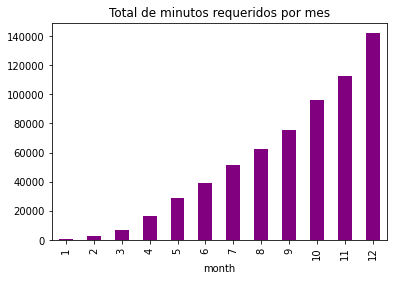

In [67]:
df_surf_p= df_surf.pivot_table(index='month',values='duration_calls',aggfunc='sum')
df_surf_p_sort=df_surf_p['duration_calls'].sort_values(ascending=True)
df_surf_p_bar=df_surf_p_sort.plot(kind='bar',title='Total de minutos requeridos por mes', color='purple')

**Total de mensajes requeridos por mes**

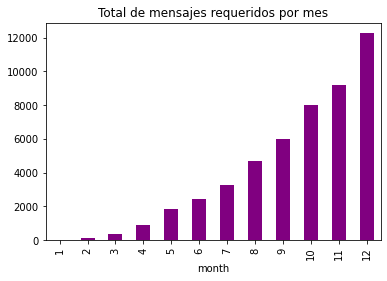

In [68]:
df_surf_p= df_surf.pivot_table(index='month',values='total_messages',aggfunc='sum')
df_surf_p_sort=df_surf_p['total_messages'].sort_values(ascending=True)
df_surf_p_bar=df_surf_p_sort.plot(kind='bar',title='Total de mensajes requeridos por mes', color='purple')

**Total de GB requeridos por mes**

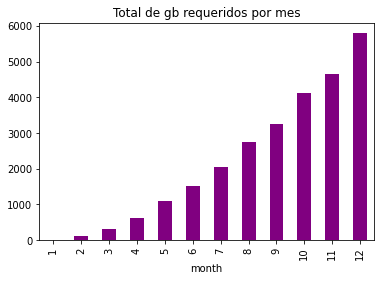

In [69]:
df_surf_p= df_surf.pivot_table(index='month',values='gb_used',aggfunc='sum')
df_surf_p_sort=df_surf_p['gb_used'].sort_values(ascending=True)
df_surf_p_bar=df_surf_p_sort.plot(kind='bar',title='Total de gb requeridos por mes', color='purple')

**Conclusión: Surf**
* Se necesitan aproximadamene 140.000 minutos para el mes de diciembre y un mínimo de 100 minutos en el mes de enero. 
* Se requieren 12.000 mensajes para el mes de diciembre y casi nulo de mensajes para el mes de Enero. 
* Para los datos se requieren 6.000 GB en el mes de diciembre y menos de 1000 GB desde Enero hasta Abril. 
* Podemos observar que el aumento de los consumos aumenta de un mes a otro y así sucesivamente hasta llegar a diciemebre donde se despunta los consumos por cada canal. 
* Con esta tendencia se podría proponer que la inversión en publicidad para la tarifa de Surf vaya aumentando a lo largo del año, puede ser trimestre a trimestre para que se acople al comportamiento de consumo de los clientes.

**Ultimate**

In [70]:
#Estadísticos que nos interesan: Media, Desviación estándar y varianza , encontrar tendencias de consumo
df_ultimate.describe()

,duration_calls,total_messages,gb_used,calls_extra,messages_extra,gb_extra,Ingreso_Total
count,720.00000,720.000000,720.000000,720.0,720.0,720.000000,720.000000
mean,405.37500,37.551389,17.306944,0.0,0.0,0.330556,72.313889
std,226.64119,34.767179,7.670108,0.0,0.0,1.627873,11.395108
min,0.00000,0.000000,0.000000,0.0,0.0,0.000000,70.000000
25%,246.00000,7.000000,13.000000,0.0,0.0,0.000000,70.000000
50%,397.00000,30.000000,17.000000,0.0,0.0,0.000000,70.000000
75%,531.00000,61.000000,21.000000,0.0,0.0,0.000000,70.000000
max,1289.00000,166.000000,46.000000,0.0,0.0,16.000000,182.000000


* En ultimate no existen consumos extras en minutos ni en mensajes, unicamente para el internet se sobrepasan en promedio 0.33 GB.
* Podemos interpretar que en este plan ofrece amplios minutos, mensajes y GB por lo que los usuarios estan cómodos y por lo general no necesitan hacer consumos adicionales.
* Los valores máximos en este plan son menores comparados con el plan de Surf dado que este plan es más limitado.

In [71]:
varianza_ultimate=np.var(df_ultimate)
varianza_ultimate

duration_calls    51294.887153
total_messages     1207.077915
gb_used              58.748841
calls_extra           0.000000
messages_extra        0.000000
gb_extra              2.646289
Ingreso_Total       129.668140
dtype: float64

* Podemos ver que la desviación estándar es mayor en las duration_calls, quiere decir que tenemos valores que esten por ensima o por debajo de 240 minutos, lo que indica que estan muy alejados de la media que es 430. Para los total:messages estan muy alejados los valores de la media que es 37 y con una desviacion estándar de 34 mensajes. Finalmente los GB consumidos indican un mayor cercanía a la media que son 41 GB con + 0 - 16 GB.

**Total de minutos requeridos por mes**

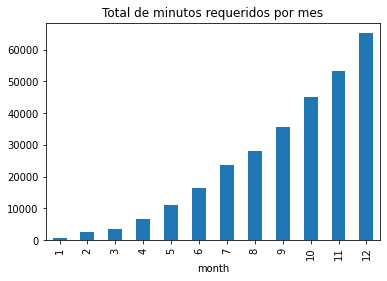

In [72]:
df_ultimate_p= df_ultimate.pivot_table(index='month',values='duration_calls',aggfunc='sum')
df_ultimate_p_sort=df_ultimate_p['duration_calls'].sort_values(ascending=True)
df_ultimate_p_bar=df_ultimate_p_sort.plot(kind='bar',title='Total de minutos requeridos por mes')

**Total de mensajes requeridos por mes**

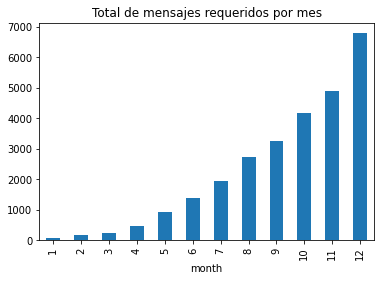

In [73]:
df_ultimate_p= df_ultimate.pivot_table(index='month',values='total_messages',aggfunc='sum')
df_ultimate_p_sort=df_ultimate_p['total_messages'].sort_values(ascending=True)
df_ultimate_p_bar=df_ultimate_p_sort.plot(kind='bar',title='Total de mensajes requeridos por mes')

**Total de GB requeridos por mes**

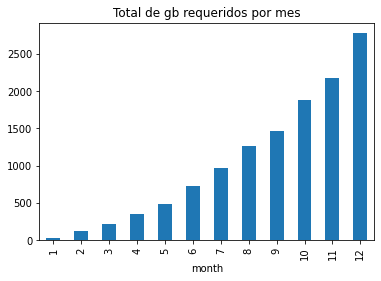

In [74]:
df_ultimate_p= df_ultimate.pivot_table(index='month',values='gb_used',aggfunc='sum')
df_ultimate_p_sort=df_ultimate_p['gb_used'].sort_values(ascending=True)
df_ultimate_p_bar=df_ultimate_p_sort.plot(kind='bar',title='Total de gb requeridos por mes')

<div class="alert alert-info"> <b>Comentario del estudiante:</b> Listo lo cambié gracias.</div>

**Conclusión: Ultimate:**
* Se necesitan aproximadamene 70.000 minutos para el mes de diciembre y un mínimo de 100 minutos en el mes de enero.

* Se requieren casi 7.000 mensajes para el mes de diciembre y casi nulo de mensajes para el mes de Enero.

* Para los datos se requieren casi 6.900 GB en el mes de diciembre y menos de 1000 GB desde Enero hasta Abril.

* Podemos observar que el aumento de los consumos aumenta de un mes a otro y así sucesivamente hasta llegar a diciemebre donde se despunta los consumos por cada canal.

* Con esta tendencia se podría proponer que la inversión en publicidad para la tarifa de Ultimate vaya aumentando a lo largo del año, puede ser trimestre a trimestre para que se acople al comportamiento de consumo de los clientes.

## Prueba de hipótesis

**1. El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere.**




Para nuestra primera hipótesis primero identificamos la variable aleatoria que en este caso es el ingreso promedio de los usuarios de ambas tarifas.

Segundo formularemos la hipótesis alternativa igual a lo que queremos comprobar que es cierto, es decir que el ingreso promedio de ambas tarifas difieren, y la hipotesis nula lo formularemos como lo contrario, el ingreso promedio de ambas tarifas son iguales. 

Para probar la hipótesis de que los ingresos medios de las dos tarifas son iguales aplicaremos el método scipy.stats.ttest_ind(array1, array2, equal_var).  

El valor crítico que utilizaremos para contrarestar la hipótesis nula será el valor p porque nos servirá para comparar con el nivel de significancia y de acuerdo al resultado aceptar o rechazar la hipotesis.  


* H₀= El ingreso promedio de los usuarios de las tarifas Ultimate y Surf son iguales.
* H₁ = El ingreso promedio de los usuarios de las tarifas Ultimate y Surf difiere. 


In [75]:
#Creamos una lista con los ingresos totales promedio de la tarifa de surf.
df_surf_income= df_surf.pivot_table(index='month',aggfunc='sum').reset_index()['Ingreso_Total']
df_surf_income

0        40.00
1       308.31
2      1052.99
3      2022.45
4      3636.17
5      4745.30
6      7527.22
7     10296.58
8     11239.81
9     15413.00
10    16305.41
11    22287.62
Name: Ingreso_Total, dtype: float64

In [76]:
#Creamos una lista con los ingresos totales promedio de la tarifa de ultimate.
df_ultimate_income= df_ultimate.pivot_table(index='month',aggfunc='sum').reset_index()['Ingreso_Total']
df_ultimate_income

0       280.0
1       490.0
2       896.0
3      1533.0
4      2051.0
5      3367.0
6      4242.0
7      5173.0
8      6195.0
9      7665.0
10     9107.0
11    11067.0
Name: Ingreso_Total, dtype: float64

In [77]:
# Estableceremos como nivel de significancia el valor alfa de 0.05
# Si el valor p es menor que alfa (nivel de significancia) rechazaremos la hipótesis nula. 

alpha= 0.05
results= st.ttest_ind(df_surf_income,df_ultimate_income,equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
    
else:
    print("No rechazamos la hipótesis nula")


p-value: 0.14626920472274685
No rechazamos la hipótesis nula


La probabildad de que nuestra estimación coincida con nuestra hipotesis nula es del 14%, y al ser mayor que el nivel de significancia, no debemos rechazamos la hipótesis nula que el promedio de los ingresos de ambos planes son iguales.


<div class="alert alert-info"> <b>Comentario del estudiante:</b> Corregido, gracias.</div>

**2. El ingreso promedio de los usuarios en el área de estados Nueva York-Nueva Jersey es diferente al de los usuarios de otras regiones.**

Para nuestra segunda  hipótesis primero identificamos la variable aleatoria que en este caso es el ingreso promedio de los usuarios de Nueva York/Nueva Yersey es diferente a los usarios de otras regiones.

Segundo formularemos la hipótesis alternativa igual a lo que queremos comprobar que es cierto, es decir que el ingreso promedio de los uarios de Nueva York/Nueva Yersey es diferente a los usarios de otras regiones, y la hipotesis nula lo formularemos como lo contrario.

Para probar la hipótesis aplicaremos el método scipy.stats.ttest_ind(array1, array2, equal_var).  

El valor crítico que utilizaremos para contrarestar la hipótesis nula será el valor p porque nos servirá para comparar con el nivel de significancia y de acuerdo al resultado aceptar o rechazar la hipotesis.  


* H₀= El ingreso promedio de los usuarios de Nueva York/Nueva Yersey es igual a los usarios de otras regiones
* H₁ = El ingreso promedio de los usuarios de Nueva York/Nueva Yersey es diferente a los usarios de otras regiones


In [78]:
#Filtramos los clientes que son de las regiones de Nueva Yersey y Nueva York
df_ny_ny= df.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"')
df_ny_ny.head(5)

duration_calls  total_messages  \
user_id month                                   
1014    11                150             9.0   
        12               1050            64.0   
1022    5                 287             0.0   
        6                 453             0.0   
        7                 448             0.0   

                                                    city  plan  gb_used  \
user_id month                                                             
1014    11     New York-Newark-Jersey City, NY-NJ-PA MSA  surf        2   
        12     New York-Newark-Jersey City, NY-NJ-PA MSA  surf        8   
1022    5      New York-Newark-Jersey City, NY-NJ-PA MSA  surf        5   
        6      New York-Newark-Jersey City, NY-NJ-PA MSA  surf       23   
        7      New York-Newark-Jersey City, NY-NJ-PA MSA  surf       10   

               calls_extra  messages_extra  gb_extra  Ingreso_Total  
user_id month                                                        
1014    11               0             0.0         0          20.00  
        12             550            14.0         0          36.92  
1022    5                0             0.0         0          20.00  
        6                0             0.0         8         100.00  
        7                0             0.0         0          20.00

In [79]:
#Filtramos los clientes que no son  de las regiones de Nueva Yersey y Nueva York
df_no_ny_ny= df.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"')
df_no_ny_ny.head(5)

duration_calls  total_messages  \
user_id month                                   
1000    12                117            11.0   
1001    8                 171            30.0   
        9                 298            44.0   
        10                373            53.0   
        11                402            36.0   

                                                city      plan  gb_used  \
user_id month                                                             
1000    12     Atlanta-Sandy Springs-Roswell, GA MSA  ultimate        2   
1001    8            Seattle-Tacoma-Bellevue, WA MSA      surf        7   
        9            Seattle-Tacoma-Bellevue, WA MSA      surf       14   
        10           Seattle-Tacoma-Bellevue, WA MSA      surf       22   
        11           Seattle-Tacoma-Bellevue, WA MSA      surf       19   

               calls_extra  messages_extra  gb_extra  Ingreso_Total  
user_id month                                                        
1000    12               0             0.0         0          70.00  
1001    8                0             0.0         0          20.00  
        9                0             0.0         0          20.00  
        10               0             3.0         7          90.09  
        11               0             0.0         4          60.00

In [80]:
#Compararemos los resultados de ambos DataFrame si el promedio y la varianza de sus ingresos totales son iguales
df_ny_ny_income=df_ny_ny['Ingreso_Total']
df_no_ny_ny_income=df_no_ny_ny['Ingreso_Total']

print('Varianzas:')
print('Varianza del Dataframe de Nueva York y Nueva Yersey:',df_ny_ny_income.var())
print('Varianza del Dataframe de las demás regiones:',df_no_ny_ny_income.var())
print()

print('Promedios:')
print('Promedio del Dataframe de Nueva York y Nueva Yersey:', df_ny_ny_income.mean())
print('Promedio del Dataframe de las demás regiones:', df_no_ny_ny_income.mean())


Varianzas:
Varianza del Dataframe de Nueva York y Nueva Yersey: 1890.016125348496
Varianza del Dataframe de las demás regiones: 2216.62748860049

Promedios:
Promedio del Dataframe de Nueva York y Nueva Yersey: 59.597241379310354
Promedio del Dataframe de las demás regiones: 64.96487473903966


Dado que las varianzas en los 2 DataFrames que hemos separado son diferentes, utilizaremos el parámetro de equal_far = False

In [81]:
# Estableceremos como nivel de significancia el valor alfa de 0.05
# Si el valor p es menor que alfa (nivel de significancia) rechazaremos la hipótesis nula. 

alpha= 0.05
results= st.ttest_ind(df_ny_ny_income, df_no_ny_ny_income, equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
    
else:
    print("No rechazamos la hipótesis nula")


p-value: 0.031124262771906316
Rechazamos la hipótesis nula


La probabildad de que nuestra estimación coincida con nuestra hipótesis nula ( que el ingreso promedio al azar de los usuarios de Nueva York/Nueva Yersey sean iguales a los usuarios de las otras zonas) es del 3%, y al ser menor que el nivel de significancia debemos rechazar la hipótesis nula. 


<div class="alert alert-info"> <b>Comentario del estudiante:</b> Corregido, gracias.</div>

<div class="alert alert-block alert-warning">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Para ambas pruebas de hipótesis, te sugiero que hagas uso de las pruebas de igualdad de varianza de [Bartlett](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html) o de [Levene](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html). La conclusión sobre si las varianzas son iguales o diferentes será más robusta.
</div>

## Conclusión general

1) Ingresos por Canal
* El plan que registró mayores ingresos totales fue de Surf por un valor de: 95.000 dólares en el 2018.
* Nuestro equipo comercial debería incrementar el presupuesto para pubicidad en el plan Surf dado que es el más rentable y especialmente en los últimos meses del año sobretodo en diciembre es cuando aumentan considerablemente los consumos extras. 


2) Comportamiento de consumo y tendencias

* El comportamiento de consumo de los usuarios en cada canal es que prefieren y/o utilizan más el uso de datos de GB llegando a sobrepasar las 55GB extras, lo que se resume en ingresos más altos para el plan de Surf que el Ultimate.
* Existe una mayor tendencia a que los clientes del plan de Surf sobrepasen los límites en cada canal, es decir que estan necesitando consumir mayores minutos, mensajes y GB dentro del plan base. 
* Los clientes bajo el plan de Ultimate su comportamiento es diferente porque no sobrepasan el consumo (a excepción de los GB), pero de manera general se concluye que no estarían necesitando minutos, mensajes y GB adicionales en el plan base.
* De manera comparativa, la demanda para el plan Surf es mayor que la demanda para Utimate en los 3 canales. Es decir 140.000 minutos, 12.000 mensajes y 6.000 GB, mientras que en Ultimate son: 70.000 minutos, 7.000 mensajes y 6.900 GB. 
* Este compartamiento se puede explicar por la  diferencia de 50 dólares adicionales en el pago mensual que harian los usuarios si optan por el plan de Ultimate.


3) Hipótesis
* No se rechaza la hipótesis que el promedio de los ingresos totales de los planes son iguales ya que el valor de que nuestra estimacion coincida fue del 14%, un valor por encima del nivel de significancia.
* La hipótesis que el promedio de los ingresos totales de usuarios de Nueva York/NuevaYersy es igual al de usuarios de otras regiones fue rechazada porque su probabilidad fue del 3% el cual es menor que el nivel de significancia.

<div class="alert alert-block alert-danger">
 
# Comentarios generales I

    
¡Buen trabajo, Sara! Has avanzado mucho en el uso de pandas, de python y ahora has incorporado conocimiento estadístico a tus análisis. ¡Felicitaciones! No obstante, debemos trabajar en un pequeño punto para que el proyecto sea aprobado. En la sección del cálculo del ingreso construiste una función que se puede mejorar sumando la tarifa base desde el principio y evitando el cálculo de métricas negativas en variables donde no son observables (llamadas, mensajes y datos).
    
Una vez esto sea corregido, revisa tus conclusiones y tu proyecto será aprobado.
 </div>

<div class="alert alert-block alert-warning">
 
# Comentarios generales II

    
¡Bien hecho, Sara! Has corregido casi todo lo sugerido. Solo nos queda un punto relativo al orden del eje x en las últimas gráficas. Una vez esto sea corregido, tu proyecto será aprobado.
 </div>

<div class="alert alert-block alert-success">
 
# Comentarios generales III

    
¡Gran trabajo, Sara! Has corregido todo lo sugerido y has aprobado tu proyecto número 4, a tan solo uno de culminar el primer módulo.
    
¡Felicitaciones! Sigue así. Vas por muy buen camino.
 </div>